## Data Cleaning and Preperation

### Importing Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('Leads.csv')

### Inspecting The Data Frame

In [4]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
data.shape

(9240, 37)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Preperation

- We noticed that some variables contain value as 'Select' which can be replaced with NaN for the further analysis

In [8]:
# Function to give the list of the columns which contan value as 'Select'

def convert_select(data):
    select_col = []
    for i in data.columns:
        if 'Select' in data[i].unique():
            select_col.append(i)
        elif 'select' in data[i].unique():
            select_col.append(i)
        else:
            pass
            
    return select_col

In [9]:
select_col = convert_select(data)

select_col

['Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City']

In [10]:
#replacing the select value into Nan

for i in data[select_col]:
    data[i].replace('Select', np.nan,inplace=True)

In [11]:
# Function which creates a data frame which give the percentage value of the null counts
def missing_dataset(df):
    missing = pd.DataFrame(columns=['columns','dtypes','null_count','null_percent']) #create data frame
    for col in df.columns:
        percentage = df[col].isnull().sum()*100 / df.shape[0]  #null_percentage
        count = df[col].isnull().sum()  #null_count
        dtyp = df[col].dtypes  #datatypes of the column
        missing = missing.append({'columns':col,'dtypes':dtyp, 'null_count':count, 'null_percent':percentage},ignore_index=True)
        missing = missing.sort_values('null_percent',ascending=False)  #this will sort the null_percentage value
            
            
    return missing

In [12]:
missing_df = missing_dataset(data)

missing_df[missing_df['null_percent']>0]

,columns,dtypes,null_count,null_percent
0,How did you hear about X Education,object,7250,78.463203
1,Lead Profile,object,6855,74.188312
2,Lead Quality,object,4767,51.590909
3,Asymmetrique Profile Index,object,4218,45.649351
4,Asymmetrique Profile Score,float64,4218,45.649351
5,Asymmetrique Activity Score,float64,4218,45.649351
6,Asymmetrique Activity Index,object,4218,45.649351
7,City,object,3669,39.707792
8,Specialization,object,3380,36.580087
9,Tags,object,3353,36.287879


In [13]:
#columns which has null percent >= 40%
missing_df[missing_df['null_percent'] >= 40]

,columns,dtypes,null_count,null_percent
0,How did you hear about X Education,object,7250,78.463203
1,Lead Profile,object,6855,74.188312
2,Lead Quality,object,4767,51.590909
3,Asymmetrique Profile Index,object,4218,45.649351
4,Asymmetrique Profile Score,float64,4218,45.649351
5,Asymmetrique Activity Score,float64,4218,45.649351
6,Asymmetrique Activity Index,object,4218,45.649351


In [14]:
#variables which has null count percent > 40%

missing40_columns = missing_df[missing_df['null_percent'] >= 40]['columns'].to_list()
missing40_columns

['How did you hear about X Education',
 'Lead Profile',
 'Lead Quality',
 'Asymmetrique Profile Index',
 'Asymmetrique Profile Score',
 'Asymmetrique Activity Score',
 'Asymmetrique Activity Index']

In [15]:
#Dropping the columns which has null percent >= 40%

data.drop(missing40_columns,axis=1,inplace=True)

In [16]:
missing_dataset(data).head(10)

,columns,dtypes,null_count,null_percent
0,City,object,3669,39.707792
1,Specialization,object,3380,36.580087
2,Tags,object,3353,36.287879
3,What matters most to you in choosing a course,object,2709,29.318182
4,What is your current occupation,object,2690,29.112554
5,Country,object,2461,26.634199
6,TotalVisits,float64,137,1.482684
7,Page Views Per Visit,float64,137,1.482684
8,Last Activity,object,103,1.114719
9,Lead Source,object,36,0.389610


In [17]:
# City

data['City'].unique()

array([nan, 'Mumbai', 'Thane & Outskirts', 'Other Metro Cities',
       'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'],
      dtype=object)

In [18]:
# Here 'City' variable is not giving any relevent insight, so we can drop

data.drop('City',axis=1,inplace=True)

In [19]:
# Specialization

data['Specialization'].unique()

array([nan, 'Business Administration', 'Media and Advertising',
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [20]:
data['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

Here we can see that 'Finance Management' is the most occuring value of count 976 in the Specialization column and the total null value count is 3380. That means Null value count > Finance Management value count so, let's create a new value 'No Info' for the null values.

In [21]:
data['Specialization'].replace(np.NaN,'No Info',inplace=True)

In [22]:
# Tags

data['Tags'].unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', nan, 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'Closed by Horizzon', 'number not provided', 'opp hangup',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [23]:
# Here 'Tags' variable is not giving any relevent insight, so we can drop

data.drop('Tags',axis=1,inplace=True)

In [24]:
# What matters most to you in choosing a course

data['What matters most to you in choosing a course'].unique()

array(['Better Career Prospects', nan, 'Flexibility & Convenience',
       'Other'], dtype=object)

In [25]:
# Here 'What matters most to you in choosing a course' variable is not giving any relevent insight, so we can drop

data.drop('What matters most to you in choosing a course',axis=1,inplace=True)

In [26]:
# What is your current occupation

data['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

Since no information has been provided Current Occupation, we can add a new category called No Information and set that as value for the null columns

In [27]:
data['What is your current occupation'].replace(np.NaN,'No Information',inplace=True)

In [28]:
# Country

data['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [29]:
counrty_percent = (len(data[data['Country'] == 'India'])*100)/len(data['Country'])
print(counrty_percent)

70.25974025974025


Since "India" occurs around 70% of times in the Country column, and country column also has around 27% as missing values, 
we shall go ahead and drop the column

In [30]:
data.drop('Country',axis=1,inplace=True)

In [31]:
# TotalVisits

data['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

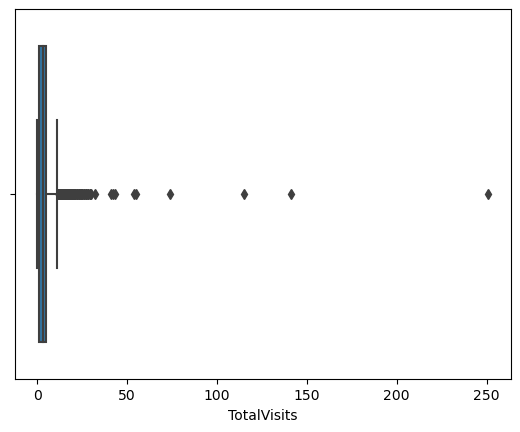

In [32]:
sns.boxplot(data['TotalVisits'])
plt.show()

- As we can see there are some points above the upper bound those are outliers and they are also in good amount
- Standard deviation of TotalVisits is also high. Hence, it is better to remove the rows with missing TotalVisits. Infact these rows are only 1.49% of the whole records.

In [33]:
data = data.dropna(subset=['TotalVisits'])

In [34]:
data['TotalVisits'].isnull().sum()

0

In [35]:
# Page Views Per Visit

data['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

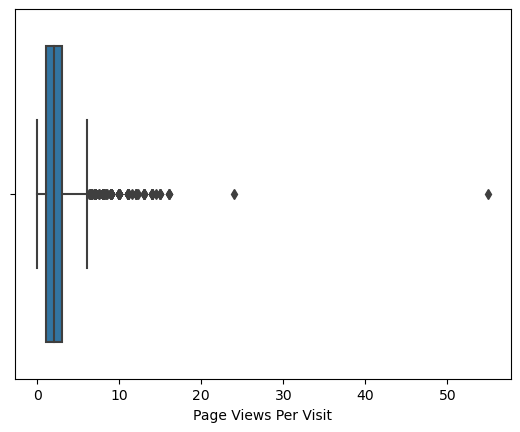

In [36]:
sns.boxplot(data['Page Views Per Visit'])
plt.show()

- As we can see there are some points above the upper bound those are outliers and they are also in good amount. Hence, it is better to remove the rows with missing 'Page Views Per Visit'. Infact these rows are only 0.32% of the whole records.

In [37]:
data = data.dropna(subset=['Page Views Per Visit'])

In [38]:
data['Page Views Per Visit'].isnull().sum()

0

In [39]:
# Lead Source

data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

From the above it can be noticed that Google appears twice with different cases. Hence we shall convert all rows with value "Google" to the same case. Also since "Google" has the major chunk of data, we can impute the null values with Google

In [40]:
data['Lead Source'].replace('google','Google',inplace=True)

data['Lead Source'].replace(np.NaN,data['Lead Source'].mode()[0],inplace=True)

In [41]:
# Defining Function to extract the categorical variables from the data
def categorical_column(x):
    cat_col = []
    for i in x.columns:
        if x[i].dtype == 'object':
            cat_col.append(i)
            
    cat_col.remove('Prospect ID')  #'Prospect ID' is not categorical variable
    return cat_col

In [42]:
cat_col = categorical_column(data)
cat_col

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [43]:
# Defining Function to extract the continious variables from the data
def continious_column(x):
    cont_col = []
    for i in x.columns:
        if x[i].dtype != 'object':
            cont_col.append(i)
            
    cont_col.remove('Lead Number')
    cont_col.remove('Converted')
    return cont_col

In [44]:
cont_col = continious_column(data)

cont_col

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [45]:
# Defining Function to give the value counts of the column's unique value
def value_count(x):
    for i in x:
    
        print('Value count for column', i)
        print(data[i].value_counts())
        print('\n')

In [46]:
value_count(cat_col)

Value count for column Lead Origin
Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64


Value count for column Lead Source
Google               2902
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64


Value count for column Do Not Email
No     8379
Yes     724
Name: Do Not Email, dtype: int64


Value count for column Do Not Call
No     9101
Yes       2
Name: Do Not Call, dtype: int64


Value count for column Las

In [47]:
#We observ that many variables has only single value which is 'No'
#These variables are not relevant for the analysis, we can drop all these variables
single_binary = ['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']
single_binary

['Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

Deleting all the columns which contains only 'No'

In [48]:
data.drop(single_binary,axis=1,inplace=True)

In [49]:
for i in cont_col:
    print(i)
    print(data[i].describe(percentiles=[.25,.5,.75,.90,.95,.99]))
    print('\n')

TotalVisits
count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64


Total Time Spent on Website
count    9103.000000
mean      481.350104
std       545.066142
min         0.000000
25%         9.000000
50%       244.000000
75%       919.500000
90%      1372.000000
95%      1556.900000
99%      1838.960000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64


Page Views Per Visit
count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64




TotalVisits
AxesSubplot(0.125,0.11;0.775x0.77)


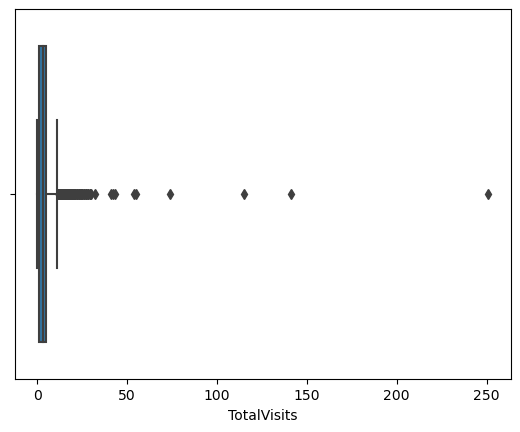



Total Time Spent on Website
AxesSubplot(0.125,0.11;0.775x0.77)


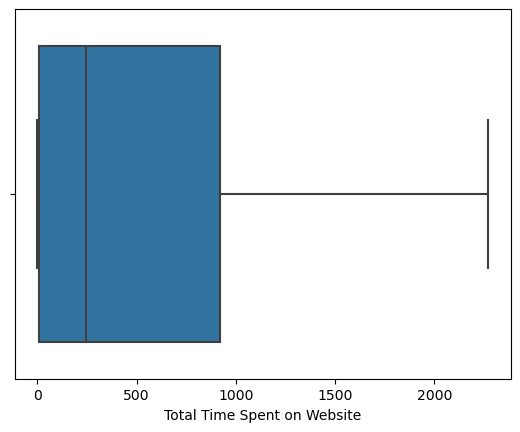



Page Views Per Visit
AxesSubplot(0.125,0.11;0.775x0.77)


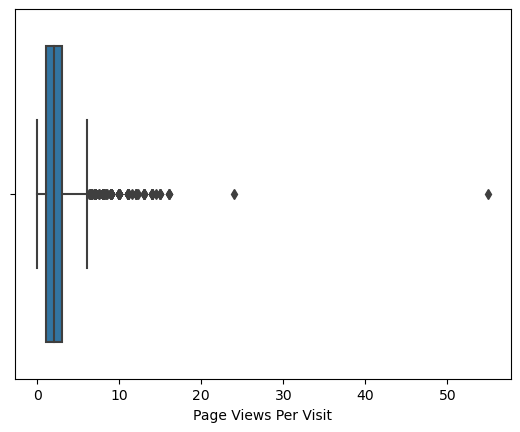

In [50]:
# Outliers Detection

for i in cont_col:
    print(i)
    print(sns.boxplot(data[i]))
    plt.show()
    print('\n')

From the above, it can be seen that outlier exists in the columns TotalVisits and Page Views Per Visit columns.

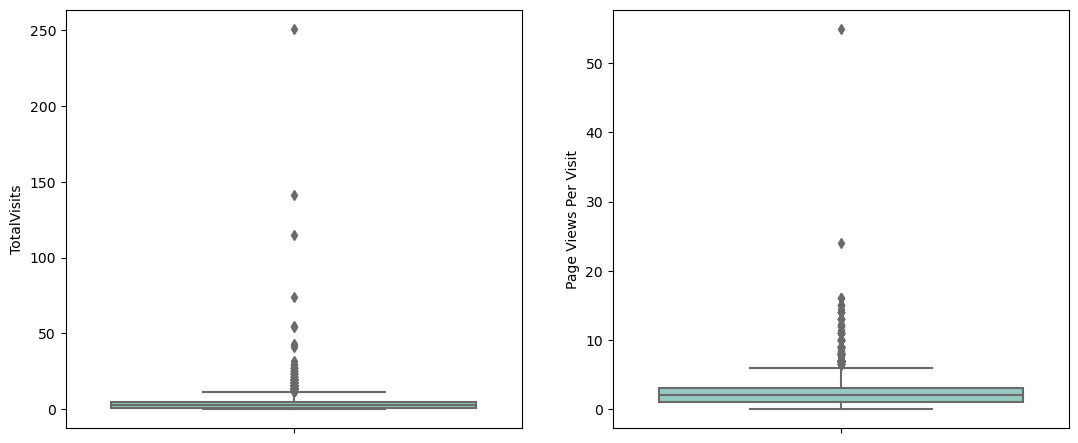

In [51]:
plt.figure(figsize=(20, 25))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', palette='Set3', data = data)
plt.subplot(4,3,2)
# sns.boxplot(y = 'Total Time Spent on Website', palette='Set3', data = data)
# plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', palette='Set3', data = data)
plt.show()

In [52]:
# Handling Outliers

q1=data["TotalVisits"].describe()["25%"]

q3=data["TotalVisits"].describe()["75%"]

iqr=q3-q1 #interquartile range

lower_bound=q1-1.5*iqr

upper_bound=q3+1.5*iqr

In [53]:
data["TotalVisits"]=np.where(data["TotalVisits"]>upper_bound,upper_bound,data["TotalVisits"])
data["TotalVisits"]=np.where(data["TotalVisits"]<lower_bound,lower_bound,data["TotalVisits"])

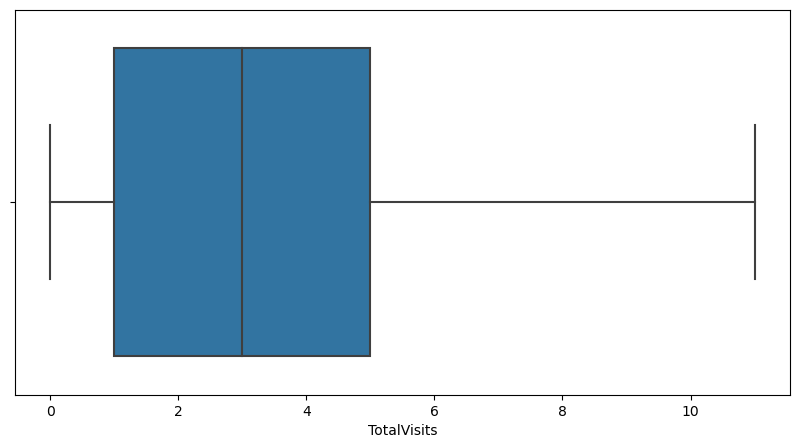

In [54]:
plt.figure(figsize = (10,5))
sns.boxplot(data.TotalVisits)
plt.show()

In [55]:
q1=data["Page Views Per Visit"].describe()["25%"]

q3=data["Page Views Per Visit"].describe()["75%"]

iqr=q3-q1 #interquartile range

lower_bound=q1-1.5*iqr

upper_bound=q3+1.5*iqr

In [56]:
data["Page Views Per Visit"]=np.where(data["Page Views Per Visit"]>upper_bound,upper_bound,data["Page Views Per Visit"])
data["Page Views Per Visit"]=np.where(data["Page Views Per Visit"]<lower_bound,lower_bound,data["Page Views Per Visit"])

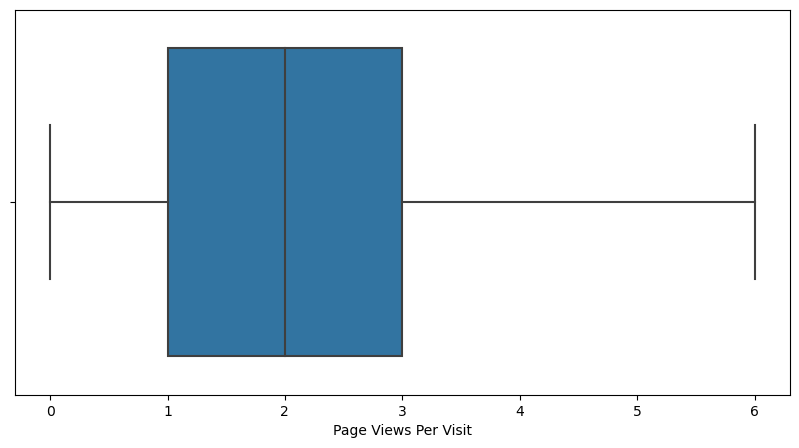

In [57]:
plt.figure(figsize = (10,5))
sns.boxplot(data['Page Views Per Visit'])
plt.show()

In [58]:
# Checking outliers at 25%,50%,75%,90%,95% and above
data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000
mean,617027.742612,0.380204,3.220696,481.350104,2.258944
std,23337.138926,0.485464,2.881792,545.066142,1.792536
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596408.000000,0.000000,1.000000,9.000000,1.000000
50%,615278.000000,0.000000,3.000000,244.000000,2.000000
75%,637166.000000,1.000000,5.000000,919.500000,3.000000
90%,650254.000000,1.000000,7.000000,1372.000000,5.000000
95%,655337.900000,1.000000,10.000000,1556.900000,6.000000
99%,659561.860000,1.000000,11.000000,1838.960000,6.000000


In [59]:
# Determine the percentage of data retained

num_data = round(100*(len(data)/9240),2)
print(num_data)

98.52


At this point, the data has been cleaned and around 98.5% of data has been retained

### Univariate Analysis

In [60]:
cat_col = categorical_column(data)
cat_col

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

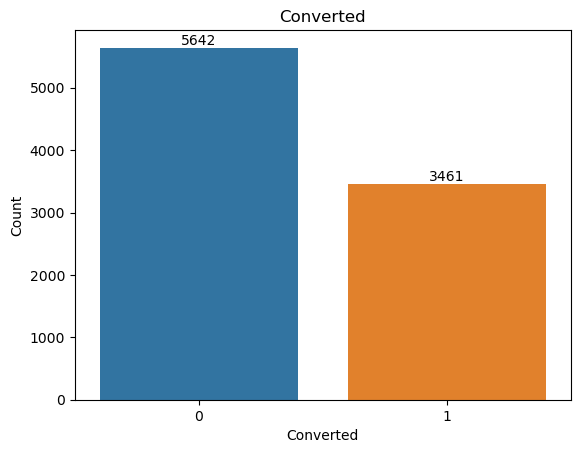

In [61]:
# Conversion Rate 

ax = sns.countplot(data=data, x='Converted')

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set labels and title
ax.set_xlabel('Converted')
ax.set_ylabel('Count')
ax.set_title('Converted')


# Show the plot
plt.show()

From the above graph, there has been a overall conversion rate of around 38%

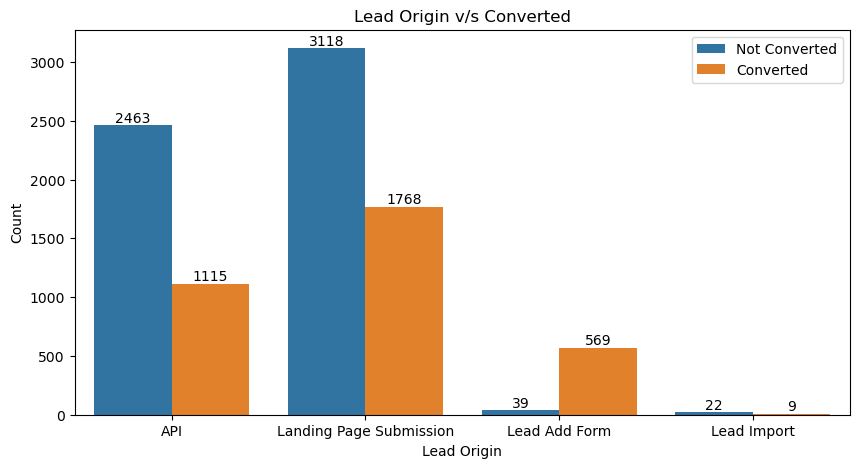

In [62]:
# Lead origin 

plt.figure(figsize = (10,5))
ax = sns.countplot(data=data, x='Lead Origin',hue='Converted')

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set labels and title
ax.set_xlabel('Lead Origin')
ax.set_ylabel('Count')
ax.set_title('Lead Origin v/s Converted')

# Move the legend to the right side
plt.legend(loc='upper right', bbox_to_anchor=(1, 1),labels=['Not Converted', 'Converted'])

# Show the plot
plt.show()

- Maximum leads are originated from Landing Page Submission
- Maximum conversion also happened from Landing Page Submission with conversion rate around 36.20%
- Lead Add Form also originates total 608 with the conversion rate around 98.60%

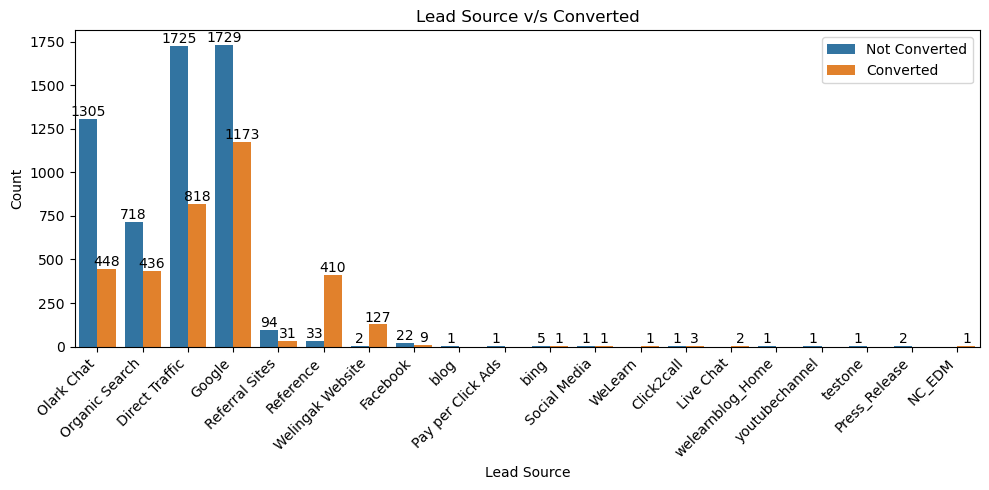

In [63]:
#Lead Source

plt.figure(figsize=(10, 5))
ax = sns.countplot(data=data, x='Lead Source', hue='Converted')

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set labels and title
ax.set_xlabel('Lead Source')
ax.set_ylabel('Count')
ax.set_title('Lead Source v/s Converted')

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Move the legend to the right side
plt.legend(loc='upper right', bbox_to_anchor=(1, 1),labels=['Not Converted', 'Converted'])

# Show the plot
plt.tight_layout()
plt.show()


- Google is the source which gives the maximum leads with the conversion rate around 40.42%
- Leads which are coming from the Welingak Website source has the highest rate of conversion around 98.4%
- Leads which are coming from the Refrence Source also has a huge rate of conversion around 92%

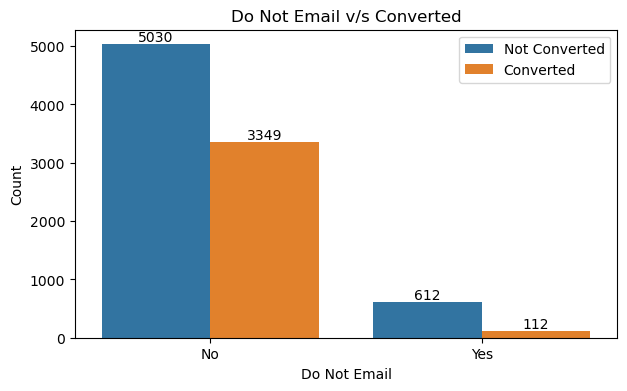

In [64]:
# Do Not Email

plt.figure(figsize = (7,4))
ax = sns.countplot(data=data, x='Do Not Email',hue='Converted')

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set labels and title
ax.set_xlabel('Do Not Email')
ax.set_ylabel('Count')
ax.set_title('Do Not Email v/s Converted')

# Move the legend to the right side
plt.legend(loc='upper right', bbox_to_anchor=(1, 1),labels=['Not Converted', 'Converted'])

# Show the plot
plt.show()

- Most of the conversion has happend from the emails that have been sent

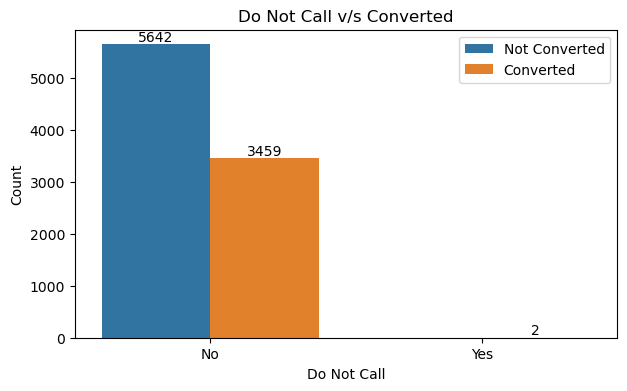

In [65]:
# Do Not Call

plt.figure(figsize = (7,4))
ax = sns.countplot(data=data, x='Do Not Call',hue='Converted')

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set labels and title
ax.set_xlabel('Do Not Call')
ax.set_ylabel('Count')
ax.set_title('Do Not Call v/s Converted')

# Move the legend to the right side
plt.legend(loc='upper right', bbox_to_anchor=(1, 1),labels=['Not Converted', 'Converted'])

# Show the plot
plt.show()

- Mostly the conversions happened when calls were made. However, it can also be seen that 2 leads opted for "Do Not Call", but they still got converted.

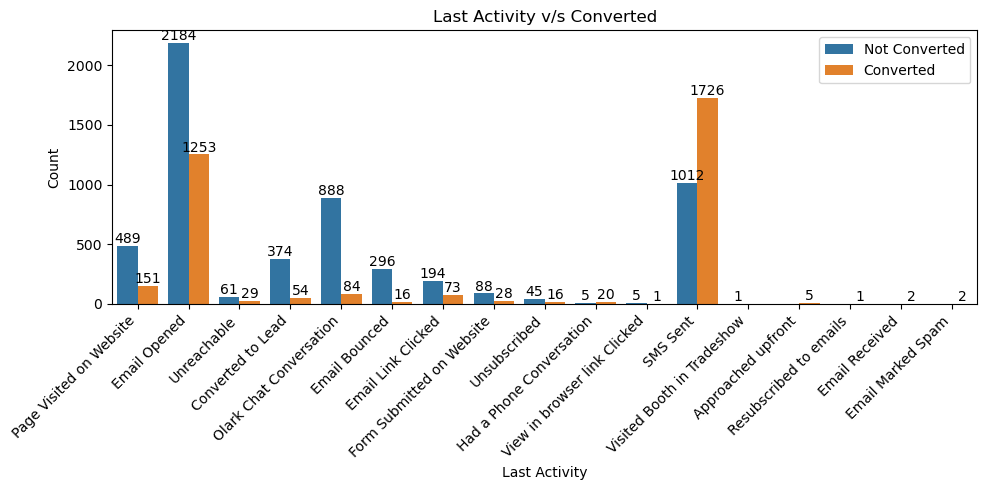

In [66]:
#Last Activity

plt.figure(figsize=(10, 5))
ax = sns.countplot(data=data, x='Last Activity', hue='Converted')

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set labels and title
ax.set_xlabel('Last Activity')
ax.set_ylabel('Count')
ax.set_title('Last Activity v/s Converted')

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Move the legend to the right side
plt.legend(loc='upper right', bbox_to_anchor=(1, 1),labels=['Not Converted', 'Converted'])

# Show the plot
plt.tight_layout()
plt.show()


- Last activity value of 'SMS Sent' had maximum conversion with conversion rate around 63%

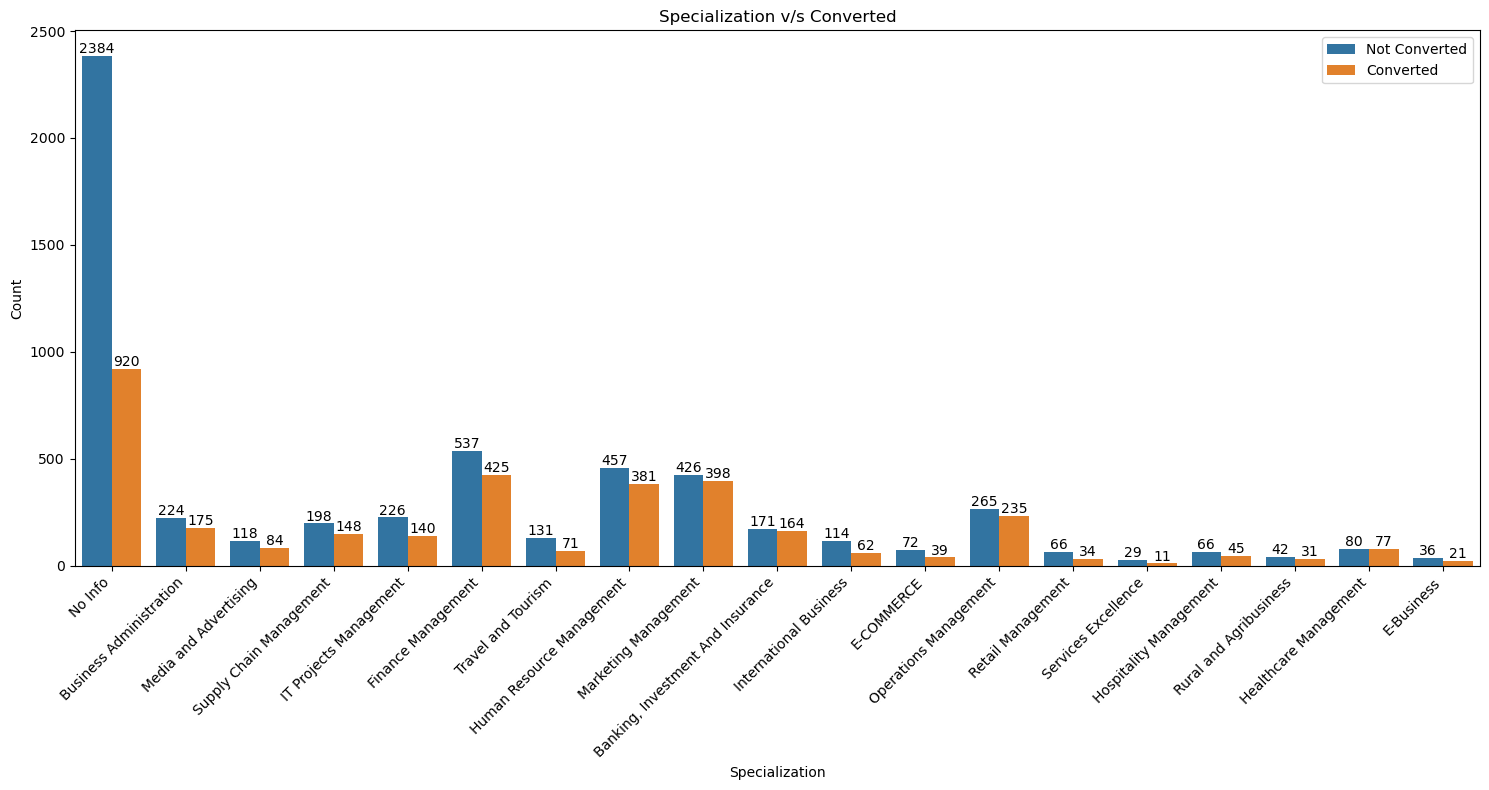

In [67]:
#Specialization

plt.figure(figsize=(15, 8))
ax = sns.countplot(data=data, x='Specialization', hue='Converted')

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set labels and title
ax.set_xlabel('Specialization')
ax.set_ylabel('Count')
ax.set_title('Specialization v/s Converted')

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Move the legend to the right side
plt.legend(loc='upper right', bbox_to_anchor=(1, 1),labels=['Not Converted', 'Converted'])

# Show the plot
plt.tight_layout()
plt.show()


This variable is not giving relevent insight, so we can drop this as well

In [68]:
data.drop('Specialization',axis=1,inplace=True)

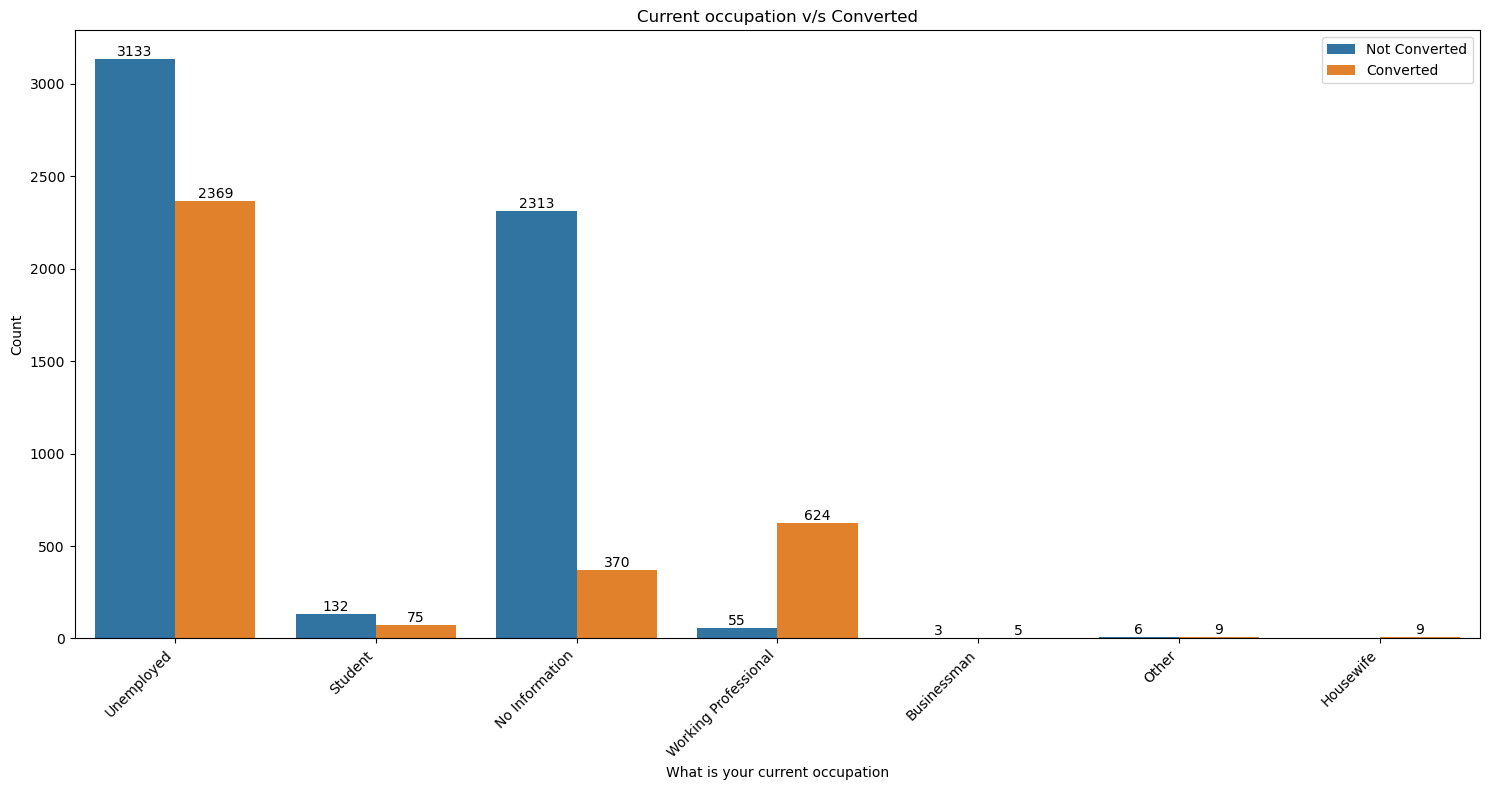

In [69]:
#What is your current occupation

plt.figure(figsize=(15, 8))
ax = sns.countplot(data=data, x='What is your current occupation', hue='Converted')

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set labels and title
ax.set_xlabel('What is your current occupation')
ax.set_ylabel('Count')
ax.set_title('Current occupation v/s Converted')

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Move the legend to the right side
plt.legend(loc='upper right', bbox_to_anchor=(1, 1),labels=['Not Converted', 'Converted'])

# Show the plot
plt.tight_layout()
plt.show()


- Here we can see that maximum coversion takes place from the section of people who are unemployed
- Working Professionals has the huge rate of conversion
- Total 9 out of 9 Housewife got converted
- Out of 8 Businessman 5 got converted and 9 out of 15 got convertd from Other section

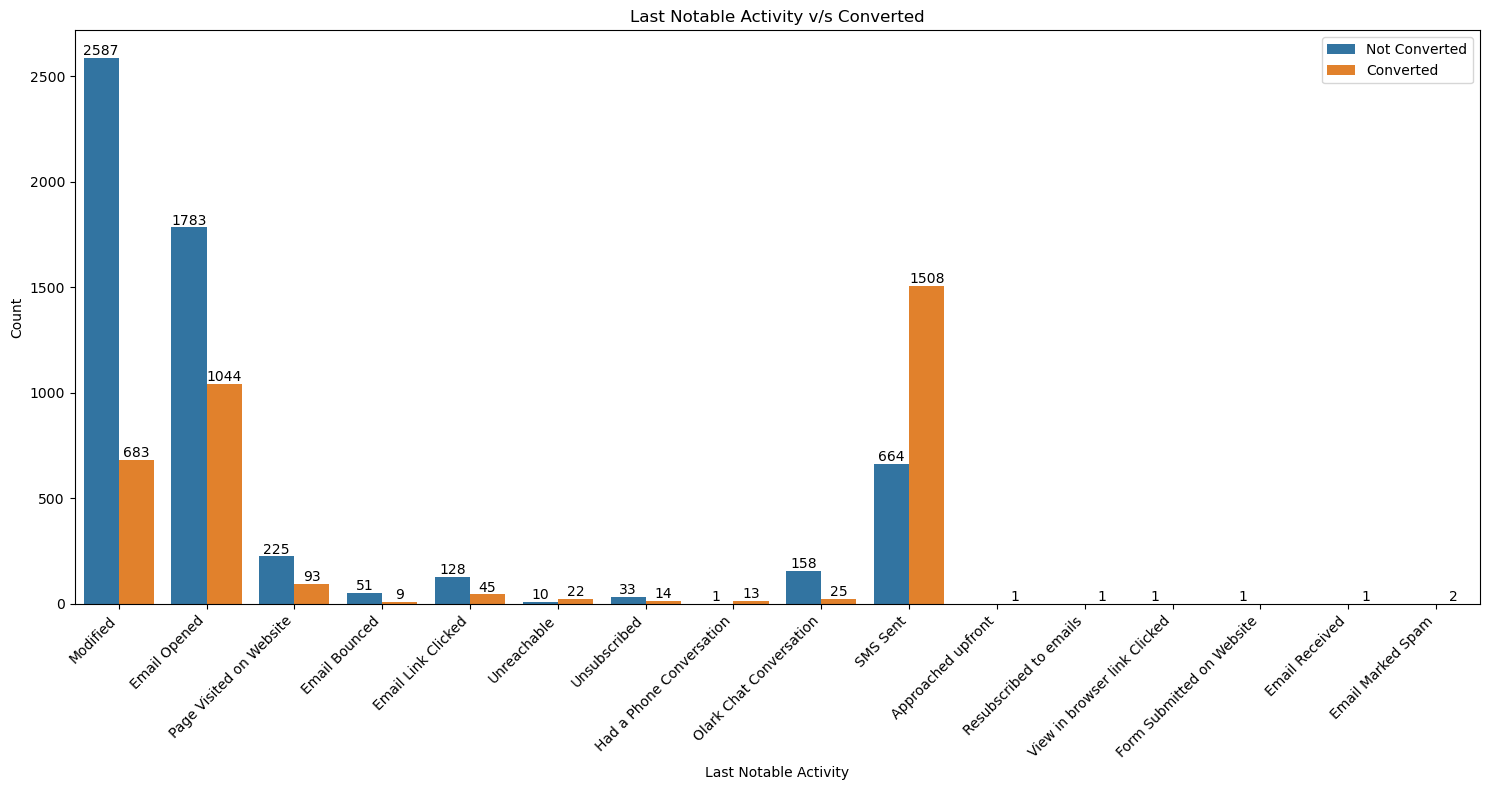

In [70]:
#Last Notable Activity

plt.figure(figsize=(15, 8))
ax = sns.countplot(data=data, x='Last Notable Activity', hue='Converted')

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set labels and title
ax.set_xlabel('Last Notable Activity')
ax.set_ylabel('Count')
ax.set_title('Last Notable Activity v/s Converted')

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Move the legend to the right side
plt.legend(loc='upper right', bbox_to_anchor=(1, 1),labels=['Not Converted', 'Converted'])

# Show the plot
plt.tight_layout()
plt.show()


- It can be noticed that the conversion rate is high for "SMS Sent"

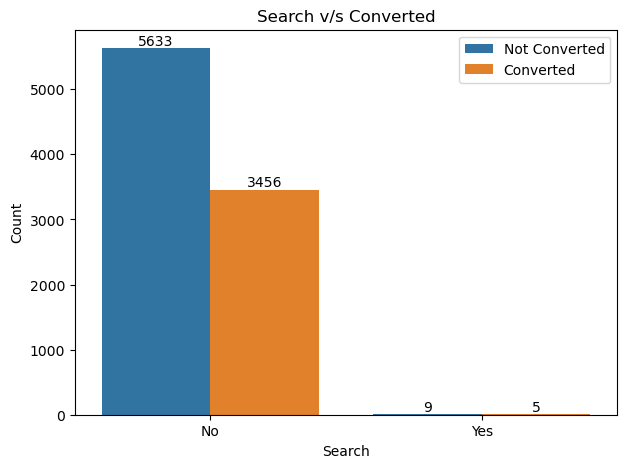

In [71]:
# Search

plt.figure(figsize = (7,5))
ax = sns.countplot(data=data, x='Search',hue='Converted')

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set labels and title
ax.set_xlabel('Search')
ax.set_ylabel('Count')
ax.set_title('Search v/s Converted')

# Move the legend to the right side
plt.legend(loc='upper right', bbox_to_anchor=(1, 1),labels=['Not Converted', 'Converted'])

# Show the plot
plt.show()

- Conversion rate is high on leads who are not through search

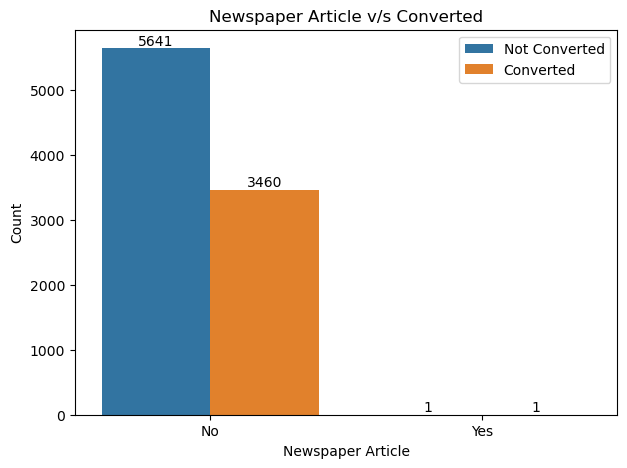

In [72]:
# Newspaper Article

plt.figure(figsize = (7,5))
ax = sns.countplot(data=data, x='Newspaper Article',hue='Converted')

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set labels and title
ax.set_xlabel('Newspaper Article')
ax.set_ylabel('Count')
ax.set_title('Newspaper Article v/s Converted')

# Move the legend to the right side
plt.legend(loc='upper right', bbox_to_anchor=(1, 1),labels=['Not Converted', 'Converted'])

# Show the plot
plt.show()

- Since Newspaper Article column has only two row with "Yes" as the value and further since 1 lead converted and 1 lead did not get converted and rest of all the values are "No", we can safely drop the column

In [73]:
#Dropping the 'Newspaper Article' column

data.drop('Newspaper Article',axis=1,inplace=True)

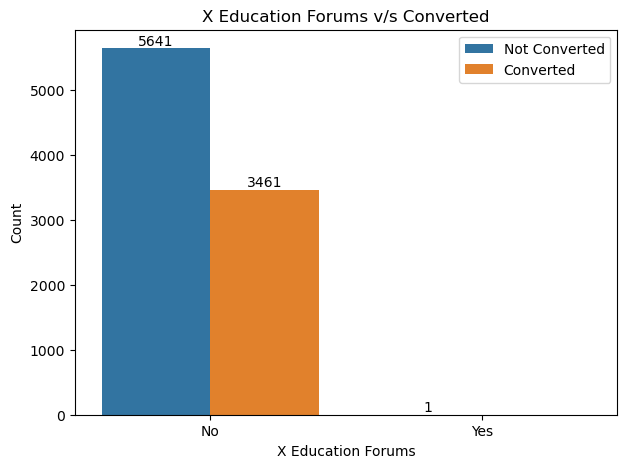

In [74]:
# X Education Forums

plt.figure(figsize = (7,5))
ax = sns.countplot(data=data, x='X Education Forums',hue='Converted')

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set labels and title
ax.set_xlabel('X Education Forums')
ax.set_ylabel('Count')
ax.set_title('X Education Forums v/s Converted')

# Move the legend to the right side
plt.legend(loc='upper right', bbox_to_anchor=(1, 1),labels=['Not Converted', 'Converted'])

# Show the plot
plt.show()

- Since X Education Forums column has only one row with "Yes" as the value and further since this lead did not get converted and rest of all the values are "No", we can safely drop the column

In [75]:
# Dropping the 'X Education Forums' column

data.drop('X Education Forums',axis=1,inplace=True)

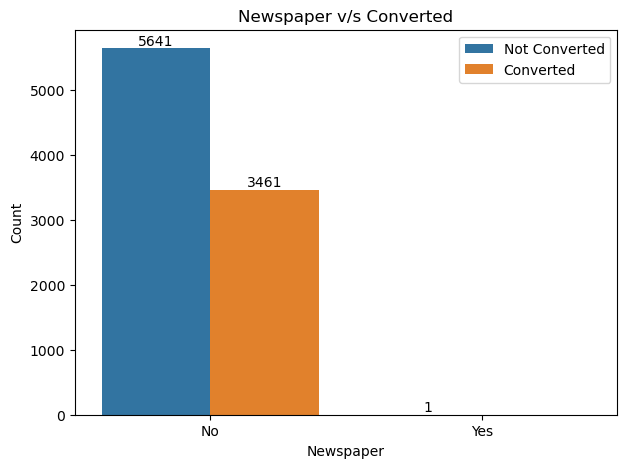

In [76]:
# Newspaper

plt.figure(figsize = (7,5))
ax = sns.countplot(data=data, x='Newspaper',hue='Converted')

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set labels and title
ax.set_xlabel('Newspaper')
ax.set_ylabel('Count')
ax.set_title('Newspaper v/s Converted')

# Move the legend to the right side
plt.legend(loc='upper right', bbox_to_anchor=(1, 1),labels=['Not Converted', 'Converted'])

# Show the plot
plt.show()

- Since Newspaper column has only one row with "Yes" as the value and further since this lead did not get converted and rest of all the values are "No", we can safely drop the column

In [77]:
data.drop('Newspaper',axis=1,inplace=True)

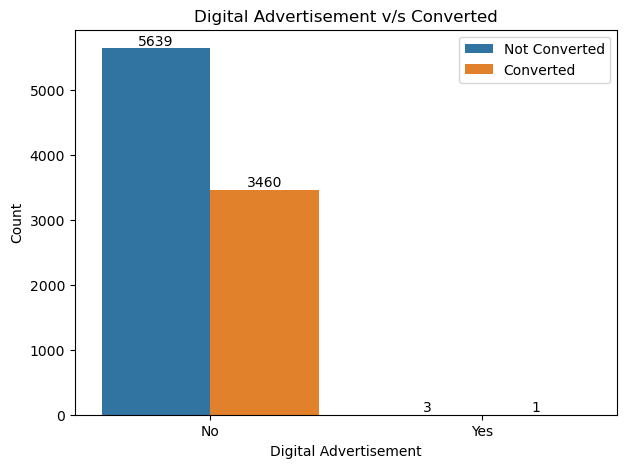

In [78]:
# Digital Advertisement

plt.figure(figsize = (7,5))
ax = sns.countplot(data=data, x='Digital Advertisement',hue='Converted')

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set labels and title
ax.set_xlabel('Digital Advertisement')
ax.set_ylabel('Count')
ax.set_title('Digital Advertisement v/s Converted')

# Move the legend to the right side
plt.legend(loc='upper right', bbox_to_anchor=(1, 1),labels=['Not Converted', 'Converted'])

# Show the plot
plt.show()

- There are 4 leads that came from digital advertisement of which 1 lead got converted and rest are converted from Non Digital Advertisement.

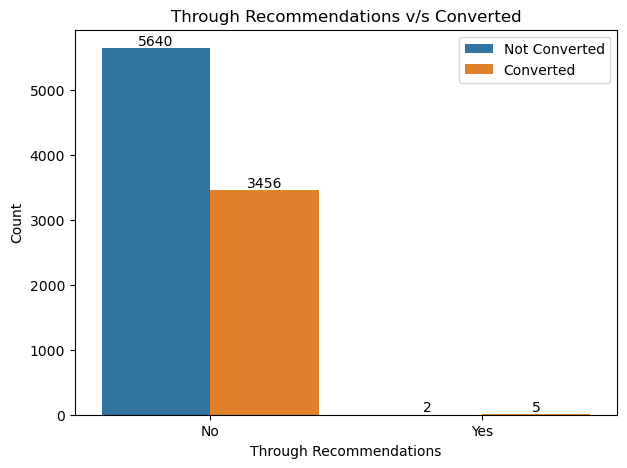

In [79]:
# Through Recommendations

plt.figure(figsize = (7,5))
ax = sns.countplot(data=data, x='Through Recommendations',hue='Converted')

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set labels and title
ax.set_xlabel('Through Recommendations')
ax.set_ylabel('Count')
ax.set_title('Through Recommendations v/s Converted')

# Move the legend to the right side
plt.legend(loc='upper right', bbox_to_anchor=(1, 1),labels=['Not Converted', 'Converted'])

# Show the plot
plt.show()

- Out of 7 leads which are coming from recommendations only 5 got converted

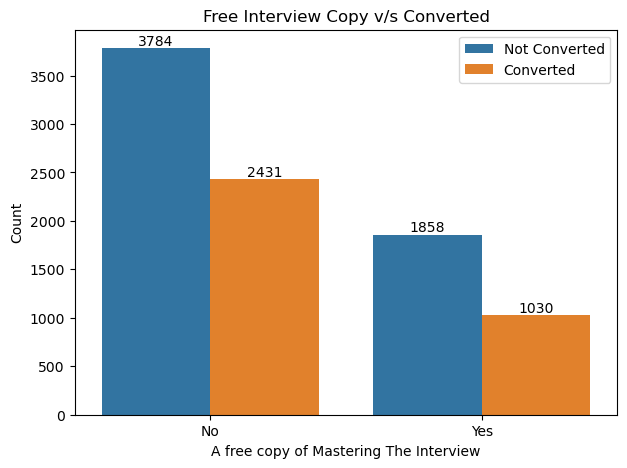

In [80]:
# A free copy of Mastering The Interview

plt.figure(figsize = (7,5))
ax = sns.countplot(data=data, x='A free copy of Mastering The Interview',hue='Converted')

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set labels and title
ax.set_xlabel('A free copy of Mastering The Interview')
ax.set_ylabel('Count')
ax.set_title('Free Interview Copy v/s Converted')

# Move the legend to the right side
plt.legend(loc='upper right', bbox_to_anchor=(1, 1),labels=['Not Converted', 'Converted'])

# Show the plot
plt.show()

- Conversion rate is high on leads who do not want a free copy of Mastering Interviews

In [81]:
# Now checking the conversion of all the numeric values

cont_col = continious_column(data)
cont_col

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

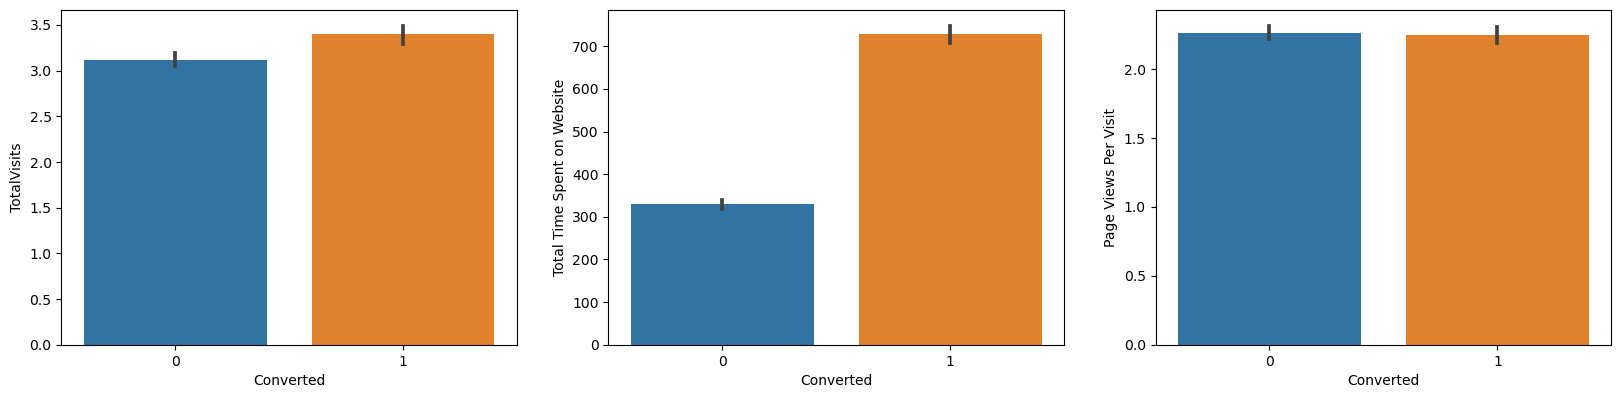

In [82]:
plt.figure(figsize=(20,20))

plt.subplot(4,3,1)
sns.barplot(data=data,x='Converted',y='TotalVisits')

plt.subplot(4,3,2)
sns.barplot(data=data,x='Converted',y='Total Time Spent on Website')

plt.subplot(4,3,3)
sns.barplot(data=data,x='Converted',y='Page Views Per Visit')

plt.show()

- From graph we can see that, people who spent more time on website has the more chance to get converted.
- The people whose website visit time is more has the more chance to get converted.

### Converting binary variables (Yes/No) to 0/1

In [83]:
cat_col = categorical_column(data)
cat_col

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'What is your current occupation',
 'Search',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [84]:
# Defining function which returns the list of the categorical columns which contains 'Yes' and 'No'
def binary_columns():
    bin_col = []
    for i in cat_col:
        if 'Yes' in data[i].unique() or 'No' in data[i].unique():
            bin_col.append(i)
            
    return bin_col

In [85]:
bin_col = binary_columns()
bin_col

['Do Not Email',
 'Do Not Call',
 'Search',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview']

In [86]:
# Defining function to convert 'Yes','No' into 1 and 0 respectively.

def binary_map(x):
    return x.map({'Yes':1,'No':0})

In [87]:
# Converting all the 'Yes' or 'No' into 1 or 0 respectively.

data[bin_col] = data[bin_col].apply(binary_map)

### Creating Dummy Variables

In [88]:
cat_col = categorical_column(data)
cat_col

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'What is your current occupation',
 'Last Notable Activity']

In [89]:
value_count(cat_col)

Value count for column Lead Origin
Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64


Value count for column Lead Source
Google               2902
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64


Value count for column Last Activity
Email Opened                    3437
SMS Sent                        2738
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead            

In [90]:
# Lead Origin : 

d_lead_origin = pd.get_dummies(data['Lead Origin'], prefix='LeadOrigin')
# Dropping Lead Add Form column
d_lead_origin1 = d_lead_origin.drop(['LeadOrigin_Lead Add Form'], 1)
#Adding the results to the master dataframe
data = pd.concat([data, d_lead_origin1], axis = 1)

# Lead Source :

d_lead_source = pd.get_dummies(data['Lead Source'], prefix='LeadSource')
# Dropping NC_EDM column
d_lead_source1 = d_lead_source.drop(['LeadSource_NC_EDM'], 1)
# Adding the results to the master dataframe
data = pd.concat([data,d_lead_source1], axis=1)

# last Activity

d_last_activity = pd.get_dummies(data['Last Activity'], prefix='LastActivity')
# Dropping Resubscribed to emails column
d_last_activity1 = d_last_activity.drop(['LastActivity_Resubscribed to emails'], 1)
# Adding the results to the master dataframe
data = pd.concat([data,d_last_activity1], axis=1)

# What is your current occupation

d_curr_occupation = pd.get_dummies(data['What is your current occupation'], prefix='CurrentOccupation')
# Dropping No Information column
d_curr_occupation1 = d_curr_occupation.drop(['CurrentOccupation_No Information'], 1)
# Adding the results to the master dataframe
data = pd.concat([data,d_curr_occupation1], axis=1)

# Last Notable Activity

d_last_notable_activity = pd.get_dummies(data['Last Notable Activity'], prefix='LastNotableActivity')
# Dropping Resubscribed to emails column
d_last_notable_activity1 = d_last_notable_activity.drop(['LastNotableActivity_Resubscribed to emails'], 1)

# Adding the results to the master dataframe
data = pd.concat([data,d_last_notable_activity1], axis=1)

data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Import,LeadSource_Click2call,LeadSource_Direct Traffic,LeadSource_Facebook,LeadSource_Google,LeadSource_Live Chat,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Pay per Click Ads,LeadSource_Press_Release,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Social Media,LeadSource_WeLearn,LeadSource_Welingak Website,LeadSource_bing,LeadSource_blog,LeadSource_testone,LeadSource_welearnblog_Home,LeadSource_youtubechannel,LastActivity_Approached upfront,LastActivity_Converted to Lead,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Marked Spam,LastActivity_Email Opened,LastActivity_Email Received,LastActivity_Form Submitted on Website,LastActivity_Had a Phone Conversation,LastActivity_Olark Chat Conversation,LastActivity_Page Visited on Website,LastActivity_SMS Sent,LastActivity_Unreachable,LastActivity_Unsubscribed,LastActivity_View in browser link Clicked,LastActivity_Visited Booth in Tradeshow,CurrentOccupation_Businessman,CurrentOccupation_Housewife,CurrentOccupation_Other,CurrentOccupation_Student,CurrentOccupation_Unemployed,CurrentOccupation_Working Professional,LastNotableActivity_Approached upfront,LastNotableActivity_Email Bounced,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Marked Spam,LastNotableActivity_Email Opened,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,0,0,0,Modified,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unemployed,0,0,0,0,Email Opened,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Student,0,0,0,1,Email Opened,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Unemployed,0,0,0,0,Modified,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,0,0,0,Modified,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


#### Dropping The Repeated Variables

In [91]:
data.drop(['Lead Origin','Lead Source','Last Activity','What is your current occupation','Lead Number','Prospect ID','Last Notable Activity'],axis=1,inplace=True)

In [92]:
data.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Import,LeadSource_Click2call,LeadSource_Direct Traffic,LeadSource_Facebook,LeadSource_Google,LeadSource_Live Chat,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Pay per Click Ads,LeadSource_Press_Release,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Social Media,LeadSource_WeLearn,LeadSource_Welingak Website,LeadSource_bing,LeadSource_blog,LeadSource_testone,LeadSource_welearnblog_Home,LeadSource_youtubechannel,LastActivity_Approached upfront,LastActivity_Converted to Lead,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Marked Spam,LastActivity_Email Opened,LastActivity_Email Received,LastActivity_Form Submitted on Website,LastActivity_Had a Phone Conversation,LastActivity_Olark Chat Conversation,LastActivity_Page Visited on Website,LastActivity_SMS Sent,LastActivity_Unreachable,LastActivity_Unsubscribed,LastActivity_View in browser link Clicked,LastActivity_Visited Booth in Tradeshow,CurrentOccupation_Businessman,CurrentOccupation_Housewife,CurrentOccupation_Other,CurrentOccupation_Student,CurrentOccupation_Unemployed,CurrentOccupation_Working Professional,LastNotableActivity_Approached upfront,LastNotableActivity_Email Bounced,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Marked Spam,LastNotableActivity_Email Opened,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [93]:
data.shape

(9103, 69)

- Since there are 69 columns, we will not be looking at the correlation using heat map as we will not be able to infer anything from the heat map due to huge data

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 69 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Do Not Email                                      9103 non-null   int64  
 1   Do Not Call                                       9103 non-null   int64  
 2   Converted                                         9103 non-null   int64  
 3   TotalVisits                                       9103 non-null   float64
 4   Total Time Spent on Website                       9103 non-null   int64  
 5   Page Views Per Visit                              9103 non-null   float64
 6   Search                                            9103 non-null   int64  
 7   Digital Advertisement                             9103 non-null   int64  
 8   Through Recommendations                           9103 non-null   int64  
 9   A free copy of Mast

- Now you can see that you have all variables as numeric.

In [95]:
# Checking for the null values

missing_dataset(data)

,columns,dtypes,null_count,null_percent
0,Do Not Email,int64,0,0.0
44,LeadSource_Olark Chat,uint8,0,0.0
50,LeadSource_blog,uint8,0,0.0
49,LeadSource_Welingak Website,uint8,0,0.0
48,LeadSource_Social Media,uint8,0,0.0
...,...,...,...,...
29,LastNotableActivity_Form Submitted on Website,uint8,0,0.0
30,LastNotableActivity_Modified,uint8,0,0.0
31,LastNotableActivity_Page Visited on Website,uint8,0,0.0
32,LastNotableActivity_Unreachable,uint8,0,0.0


In [96]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
data.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Import,LeadSource_Click2call,LeadSource_Direct Traffic,LeadSource_Facebook,LeadSource_Google,LeadSource_Live Chat,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Pay per Click Ads,LeadSource_Press_Release,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Social Media,LeadSource_WeLearn,LeadSource_Welingak Website,LeadSource_bing,LeadSource_blog,LeadSource_testone,LeadSource_welearnblog_Home,LeadSource_youtubechannel,LastActivity_Approached upfront,LastActivity_Converted to Lead,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Marked Spam,LastActivity_Email Opened,LastActivity_Email Received,LastActivity_Form Submitted on Website,LastActivity_Had a Phone Conversation,LastActivity_Olark Chat Conversation,LastActivity_Page Visited on Website,LastActivity_SMS Sent,LastActivity_Unreachable,LastActivity_Unsubscribed,LastActivity_View in browser link Clicked,LastActivity_Visited Booth in Tradeshow,CurrentOccupation_Businessman,CurrentOccupation_Housewife,CurrentOccupation_Other,CurrentOccupation_Student,CurrentOccupation_Unemployed,CurrentOccupation_Working Professional,LastNotableActivity_Approached upfront,LastNotableActivity_Email Bounced,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Marked Spam,LastNotableActivity_Email Opened,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
count,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000
mean,0.079534,0.000220,0.380204,3.220696,481.350104,2.258944,0.001538,0.000439,0.000769,0.317258,0.393057,0.536746,0.003405,0.000439,0.279358,0.003405,0.318796,0.000220,0.192574,0.126771,0.000110,0.000220,0.048665,0.013732,0.000220,0.000110,0.014171,0.000659,0.000110,0.000110,0.000110,0.000110,0.000549,0.047017,0.034274,0.029331,0.000220,0.377568,0.000220,0.012743,0.002746,0.106778,0.070306,0.300780,0.009887,0.006701,0.000659,0.000110,0.000879,0.000989,0.001648,0.022740,0.604416,0.074591,0.000110,0.006591,0.019005,0.000220,0.310557,0.000110,0.000110,0.001538,0.359222,0.020103,0.034934,0.238603,0.003515,0.005163,0.000110
std,0.270586,0.014822,0.485464,2.881792,545.066142,1.792536,0.039189,0.020959,0.027721,0.465434,0.488456,0.498675,0.058260,0.020959,0.448709,0.058260,0.466035,0.014822,0.394343,0.332735,0.010481,0.014822,0.215179,0.116382,0.014822,0.010481,0.118203,0.025666,0.010481,0.010481,0.010481,0.010481,0.023431,0.211688,0.181943,0.168742,0.014822,0.484805,0.014822,0.112170,0.052336,0.308848,0.255677,0.458622,0.098945,0.081590,0.025666,0.010481,0.029634,0.031430,0.040562,0.149081,0.489003,0.262744,0.010481,0.080923,0.136549,0.014822,0.462747,0.010481,0.010481,0.039189,0.479799,0.140361,0.18

- From the distribution shown above, we can see that there no outliers in the data. The numbers are gradually increasing.

## Processing

### Train - Test Split

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
# Putting Feature Variable to X

X = data.drop('Converted',axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Import,LeadSource_Click2call,LeadSource_Direct Traffic,LeadSource_Facebook,LeadSource_Google,LeadSource_Live Chat,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Pay per Click Ads,LeadSource_Press_Release,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Social Media,LeadSource_WeLearn,LeadSource_Welingak Website,LeadSource_bing,LeadSource_blog,LeadSource_testone,LeadSource_welearnblog_Home,LeadSource_youtubechannel,LastActivity_Approached upfront,LastActivity_Converted to Lead,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Marked Spam,LastActivity_Email Opened,LastActivity_Email Received,LastActivity_Form Submitted on Website,LastActivity_Had a Phone Conversation,LastActivity_Olark Chat Conversation,LastActivity_Page Visited on Website,LastActivity_SMS Sent,LastActivity_Unreachable,LastActivity_Unsubscribed,LastActivity_View in browser link Clicked,LastActivity_Visited Booth in Tradeshow,CurrentOccupation_Businessman,CurrentOccupation_Housewife,CurrentOccupation_Other,CurrentOccupation_Student,CurrentOccupation_Unemployed,CurrentOccupation_Working Professional,LastNotableActivity_Approached upfront,LastNotableActivity_Email Bounced,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Marked Spam,LastNotableActivity_Email Opened,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [99]:
# Putting response variable to y

y = data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [100]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, test_size=0.3, random_state=100)

### Feature Scaling

In [101]:
from sklearn.preprocessing import MinMaxScaler

In [102]:
scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Import,LeadSource_Click2call,LeadSource_Direct Traffic,LeadSource_Facebook,LeadSource_Google,LeadSource_Live Chat,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Pay per Click Ads,LeadSource_Press_Release,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Social Media,LeadSource_WeLearn,LeadSource_Welingak Website,LeadSource_bing,LeadSource_blog,LeadSource_testone,LeadSource_welearnblog_Home,LeadSource_youtubechannel,LastActivity_Approached upfront,LastActivity_Converted to Lead,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Marked Spam,LastActivity_Email Opened,LastActivity_Email Received,LastActivity_Form Submitted on Website,LastActivity_Had a Phone Conversation,LastActivity_Olark Chat Conversation,LastActivity_Page Visited on Website,LastActivity_SMS Sent,LastActivity_Unreachable,LastActivity_Unsubscribed,LastActivity_View in browser link Clicked,LastActivity_Visited Booth in Tradeshow,CurrentOccupation_Businessman,CurrentOccupation_Housewife,CurrentOccupation_Other,CurrentOccupation_Student,CurrentOccupation_Unemployed,CurrentOccupation_Working Professional,LastNotableActivity_Approached upfront,LastNotableActivity_Email Bounced,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Marked Spam,LastNotableActivity_Email Opened,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
7962,0,0,0.272727,0.570794,0.250000,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5520,0,0,0.636364,0.026631,1.000000,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1962,0,0,0.454545,0.075011,0.416667,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1566,0,0,1.000000,0.550821,0.583333,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9170,0,0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


### Checking the Conversion Rate percentage

In [103]:
converted = (sum(data['Converted'])/len(data['Converted'].index))*100
converted

38.02043282434362

- We have almost 39% conversion Rate

## Model Building

### Building 1st model using Statsmodels

In [104]:
import statsmodels.api as sm

In [105]:
# Loggistic Regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())

logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6307
Model Family:                Binomial   Df Model:                           64
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2506.2
Date:                Sat, 20 May 2023   Deviance:                       5012.3
Time:                        21:47:29   Pearson chi2:                 6.24e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4179
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               50.6581   1.12e+05      0.000      1.000    -2.2e+05     2.2e+05
Do Not Email                                        -1.3597      0.216     -6.282      0.000      -1.784      -0.935
Do Not Call                                         22.8416   5.29e+04      0.000      1.000   -1.04e+05    1.04e+05
TotalVisits                                          1.4089      0.210      6.694      0.000       0.996       1.821
Total Time Spent on Website                          4.5050      0.171     26.412      0.000       4.171       4.839
Page Views Per Visit                                -1.0314      0.209     -4.934      0.000      -1.441      -0.622
Search                                              -0.2127      0.812     -0.262      0.793      -1.804       1.379
Digital Advertisement                               -0.9133      1.228     -0.743      0.457      -3.321       1.494
Through Recommendations                              0.6495      1.377      0.472      0.637      -2.050       3.349
A free copy of Mastering The Interview              -0.0296      0.108     -0.274      0.784      -0.241       0.182
LeadOrigin_API                                      -3.9120      1.056     -3.705      0.000      -5.981      -1.843
LeadOrigin_Landing Page Submission                  -4.0885      1.057     -3.866      0.000      -6.161      -2.016
LeadOrigin_Lead Import                              -2.5321      1.794     -1.412      0.158      -6.047       0.983
LeadSource_Click2call                              -25.9240   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
LeadSource_Direct Traffic                          -24.4174   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
LeadSource_Facebook                                -24.7222   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
LeadSource_Google                                  -24.1390   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
LeadSource_Live Chat                                -4.1710   9.73e+04  -4.29e-05      1.000   -1.91e+05    1.91e+05
LeadSource_Olark Chat                              -23.1799   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
LeadSource_Organic Search                          -24.3757   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
LeadSource_Pay per Click Ads                       -45.9641   1.12e+05     -0.000      1.000    -2.2e+05     2.2e+05
LeadSource_Press_Release                          3.498e-09   7.56e-06      0.000      1.000   -1.48e-05    1.48e-05
LeadSource_Reference                               -24.6839   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
LeadSource_Referral Sites                

### Feature Selection Using RFE

- Since the number of features is huge, let's first start off with an automated feature selection technique (RFE) and then move to manual feature elimination (using p-values and VIFs)

In [106]:
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFE

In [107]:
logreg = LogisticRegression()

# running RFE with 20 variables as output

rfe = RFE(logreg, n_features_to_select=20)            
rfe = rfe.fit(X_train, y_train)

In [108]:
rfe.support_

array([ True, False,  True,  True, False, False, False, False, False,
        True,  True,  True, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False])

In [109]:
list(zip(X_train, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 15),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Search', False, 43),
 ('Digital Advertisement', False, 16),
 ('Through Recommendations', False, 31),
 ('A free copy of Mastering The Interview', False, 46),
 ('LeadOrigin_API', True, 1),
 ('LeadOrigin_Landing Page Submission', True, 1),
 ('LeadOrigin_Lead Import', True, 1),
 ('LeadSource_Click2call', False, 33),
 ('LeadSource_Direct Traffic', False, 20),
 ('LeadSource_Facebook', False, 5),
 ('LeadSource_Google', False, 22),
 ('LeadSource_Live Chat', False, 37),
 ('LeadSource_Olark Chat', True, 1),
 ('LeadSource_Organic Search', False, 21),
 ('LeadSource_Pay per Click Ads', False, 35),
 ('LeadSource_Press_Release', False, 49),
 ('LeadSource_Reference', True, 1),
 ('LeadSource_Referral Sites', False, 19),
 ('LeadSource_Social Media', False, 12),
 ('LeadSource_WeLearn', False, 23),
 ('LeadSource_Welingak Website', True, 1),


In [110]:
# variables shortlisted by RFE

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'LeadOrigin_API', 'LeadOrigin_Landing Page Submission',
       'LeadOrigin_Lead Import', 'LeadSource_Olark Chat',
       'LeadSource_Reference', 'LeadSource_Welingak Website',
       'LastActivity_Approached upfront', 'LastActivity_Converted to Lead',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'CurrentOccupation_Housewife', 'CurrentOccupation_Other',
       'CurrentOccupation_Student', 'CurrentOccupation_Unemployed',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_Unreachable'],
      dtype='object')

### 2nd Model

In [111]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2579.2
Date:                Sat, 20 May 2023   Deviance:                       5158.4
Time:                        21:47:42   Pearson chi2:                 6.35e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4044
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            0.6145      0.788      0.780      0.436      -0.930       2.159
Do Not Email                                    -1.4686      0.167     -8.800      0.000      -1.796      -1.141
TotalVisits                                      0.8198      0.165      4.957      0.000       0.496       1.144
Total Time Spent on Website                      4.5367      0.168     27.080      0.000       4.208       4.865
LeadOrigin_API                                  -4.0110      0.789     -5.086      0.000      -5.557      -2.465
LeadOrigin_Landing Page Submission              -4.3480      0.787     -5.525      0.000      -5.890      -2.806
LeadOrigin_Lead Import                          -2.9286      0.902     -3.247      0.001      -4.696      -1.161
LeadSource_Olark Chat                            1.3422      0.135      9.933      0.000       1.077       1.607
LeadSource_Reference                            -0.2759      0.812     -0.340      0.734      -1.868       1.316
LeadSource_Welingak Website                      1.5725      1.061      1.482      0.138      -0.508       3.653
LastActivity_Approached upfront                 22.6283      2e+04      0.001      0.999   -3.93e+04    3.93e+04
LastActivity_Converted to Lead                  -1.1096      0.217     -5.117      0.000      -1.535      -0.685
LastActivity_Olark Chat Conversation            -1.3727      0.166     -8.257      0.000      -1.699      -1.047
LastActivity_SMS Sent                            1.2814      0.076     16.833      0.000       1.132       1.431
CurrentOccupation_Housewife                     24.3922   1.59e+04      0.002      0.999   -3.12e+04    3.13e+04
CurrentOccupation_Other                          1.6071      0.626      2.567      0.010       0.380       2.834
CurrentOccupation_Student                        1.4041      0.244      5.747      0.000       0.925       1.883
CurrentOccupation_Unemployed                     1.2265      0.088     13.872      0.000       1.053       1.400
CurrentOccupation_Working Professional           3.7943      0.199     19.069      0.000       3.404       4.184
LastNotableActivity_Had a Phone Conversation     3.1239      1.205      2.593      0.010       0.763       5.485
LastNotableActivity_Unreachable                  1.9258      0.516      3.735      0.000       0.915       2.936
================================================================================================================
"""

- Removing column LastActivity_Approached_Upfront as it has a high pvalue and hence is insignificant

In [112]:
col = col.drop('LastActivity_Approached upfront',1)

### 3rd Model

In [113]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6352
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2582.8
Date:                Sat, 20 May 2023   Deviance:                       5165.7
Time:                        21:47:43   Pearson chi2:                 6.36e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4037
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            0.6137      0.788      0.779      0.436      -0.931       2.158
Do Not Email                                    -1.4718      0.167     -8.820      0.000      -1.799      -1.145
TotalVisits                                      0.8165      0.165      4.937      0.000       0.492       1.141
Total Time Spent on Website                      4.5444      0.167     27.133      0.000       4.216       4.873
LeadOrigin_API                                  -4.0127      0.789     -5.088      0.000      -5.558      -2.467
LeadOrigin_Landing Page Submission              -4.3476      0.787     -5.525      0.000      -5.890      -2.805
LeadOrigin_Lead Import                          -2.9312      0.902     -3.250      0.001      -4.699      -1.164
LeadSource_Olark Chat                            1.3534      0.135     10.022      0.000       1.089       1.618
LeadSource_Reference                            -0.2781      0.812     -0.342      0.732      -1.870       1.314
LeadSource_Welingak Website                      1.5716      1.061      1.481      0.139      -0.509       3.652
LastActivity_Converted to Lead                  -1.1146      0.217     -5.139      0.000      -1.540      -0.690
LastActivity_Olark Chat Conversation            -1.3811      0.166     -8.311      0.000      -1.707      -1.055
LastActivity_SMS Sent                            1.2766      0.076     16.776      0.000       1.127       1.426
CurrentOccupation_Housewife                     24.3920   1.59e+04      0.002      0.999   -3.12e+04    3.13e+04
CurrentOccupation_Other                          1.6070      0.626      2.566      0.010       0.380       2.834
CurrentOccupation_Student                        1.4036      0.244      5.745      0.000       0.925       1.882
CurrentOccupation_Unemployed                     1.2315      0.088     13.932      0.000       1.058       1.405
CurrentOccupation_Working Professional           3.7958      0.199     19.074      0.000       3.406       4.186
LastNotableActivity_Had a Phone Conversation     3.1210      1.205      2.590      0.010       0.759       5.483
LastNotableActivity_Unreachable                  1.9223      0.516      3.728      0.000       0.912       2.933
================================================================================================================
"""

- Removing column CurrentOccupation_Housewife as it has a high pvalue and hence is insignificant

In [114]:
col = col.drop('CurrentOccupation_Housewife',1)

### 4th Model

In [115]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6353
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2594.6
Date:                Sat, 20 May 2023   Deviance:                       5189.2
Time:                        21:47:43   Pearson chi2:                 6.39e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4015
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            0.6571      0.788      0.834      0.404      -0.887       2.201
Do Not Email                                    -1.4779      0.167     -8.869      0.000      -1.804      -1.151
TotalVisits                                      0.7970      0.165      4.829      0.000       0.474       1.120
Total Time Spent on Website                      4.5423      0.167     27.187      0.000       4.215       4.870
LeadOrigin_API                                  -4.0145      0.788     -5.091      0.000      -5.560      -2.469
LeadOrigin_Landing Page Submission              -4.3407      0.787     -5.517      0.000      -5.883      -2.799
LeadOrigin_Lead Import                          -2.9393      0.901     -3.260      0.001      -4.706      -1.172
LeadSource_Olark Chat                            1.3406      0.135      9.952      0.000       1.077       1.605
LeadSource_Reference                            -0.2654      0.812     -0.327      0.744      -1.857       1.326
LeadSource_Welingak Website                      1.5682      1.061      1.478      0.139      -0.512       3.648
LastActivity_Converted to Lead                  -1.1297      0.217     -5.214      0.000      -1.554      -0.705
LastActivity_Olark Chat Conversation            -1.3886      0.166     -8.366      0.000      -1.714      -1.063
LastActivity_SMS Sent                            1.2635      0.076     16.648      0.000       1.115       1.412
CurrentOccupation_Other                          1.5729      0.626      2.511      0.012       0.345       2.800
CurrentOccupation_Student                        1.3696      0.244      5.613      0.000       0.891       1.848
CurrentOccupation_Unemployed                     1.1993      0.088     13.693      0.000       1.028       1.371
CurrentOccupation_Working Professional           3.7612      0.199     18.943      0.000       3.372       4.150
LastNotableActivity_Had a Phone Conversation     3.1001      1.201      2.581      0.010       0.746       5.454
LastNotableActivity_Unreachable                  1.9037      0.515      3.697      0.000       0.894       2.913
================================================================================================================
"""

- Removing column LeadSource_Reference as it has high pvalue and hence is insignificant

In [116]:
col = col.drop('LeadSource_Reference',1)

### 5th Model

In [117]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6354
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2594.7
Date:                Sat, 20 May 2023   Deviance:                       5189.4
Time:                        21:47:43   Pearson chi2:                 6.40e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4015
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            0.4127      0.232      1.782      0.075      -0.041       0.867
Do Not Email                                    -1.4729      0.166     -8.890      0.000      -1.798      -1.148
TotalVisits                                      0.7974      0.165      4.832      0.000       0.474       1.121
Total Time Spent on Website                      4.5423      0.167     27.188      0.000       4.215       4.870
LeadOrigin_API                                  -3.7708      0.240    -15.694      0.000      -4.242      -3.300
LeadOrigin_Landing Page Submission              -4.0971      0.235    -17.402      0.000      -4.559      -3.636
LeadOrigin_Lead Import                          -2.6952      0.497     -5.424      0.000      -3.669      -1.721
LeadSource_Olark Chat                            1.3409      0.135      9.955      0.000       1.077       1.605
LeadSource_Welingak Website                      1.8109      0.753      2.406      0.016       0.336       3.286
LastActivity_Converted to Lead                  -1.1290      0.217     -5.211      0.000      -1.554      -0.704
LastActivity_Olark Chat Conversation            -1.3883      0.166     -8.364      0.000      -1.714      -1.063
LastActivity_SMS Sent                            1.2643      0.076     16.665      0.000       1.116       1.413
CurrentOccupation_Other                          1.5730      0.626      2.511      0.012       0.345       2.801
CurrentOccupation_Student                        1.3692      0.244      5.611      0.000       0.891       1.847
CurrentOccupation_Unemployed                     1.1994      0.088     13.694      0.000       1.028       1.371
CurrentOccupation_Working Professional           3.7607      0.199     18.940      0.000       3.372       4.150
LastNotableActivity_Had a Phone Conversation     3.1007      1.201      2.582      0.010       0.747       5.455
LastNotableActivity_Unreachable                  1.9039      0.515      3.697      0.000       0.895       2.913
================================================================================================================
"""

- Since the 5th Model seems to be stable with significant pvalues, we shall go ahead with this model for further analysis

In [118]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.830541
5520    0.135100
1962    0.373426
1566    0.966938
9170    0.306227
5097    0.117411
8954    0.462440
309     0.169059
5519    0.320190
1050    0.463943
dtype: float64

In [119]:
# Reshape

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.83054061, 0.13509953, 0.37342621, 0.96693763, 0.30622727,
       0.11741114, 0.46243963, 0.16905873, 0.32019038, 0.46394279])

### Creating a dataframe with the actual converted flag and the predicted probabilities

In [120]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
0,0,0.830541,7962
1,0,0.135100,5520
2,0,0.373426,1962
3,1,0.966938,1566
4,0,0.306227,9170


### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [121]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted
0,0,0.830541,7962,1
1,0,0.135100,5520,0
2,0,0.373426,1962,0
3,1,0.966938,1566,1
4,0,0.306227,9170,0


## Confusion metrics and Accuracy

In [122]:
from sklearn import metrics

In [123]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3511  442]
 [ 723 1696]]


In [124]:
# Predicted     not_converted    converted
# Actual
# not_converted        3511      442
# converted            723       1696

In [125]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8171688637790333


- Accuracy rate is around 81% which is good. However we will also need to calculate the other metrics as we cannot depend only on the accuracy metrics

## Manual Feature Elimination 

### Checking VIFs

In [126]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [127]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,LeadOrigin_Landing Page Submission,5.27
3,LeadOrigin_API,4.69
1,TotalVisits,3.80
6,LeadSource_Olark Chat,2.82
13,CurrentOccupation_Unemployed,2.82
2,Total Time Spent on Website,2.35
10,LastActivity_SMS Sent,1.58
9,LastActivity_Olark Chat Conversation,1.46
14,CurrentOccupation_Working Professional,1.22
8,LastActivity_Converted to Lead,1.17


- Variables LeadOrigin_Landing Page Submission has high VIF. It's best to drop this variable as it will not helping much with prediction and unnecessarily making the model complex. 

In [128]:
col = col.drop("LeadOrigin_Landing Page Submission",1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'LeadOrigin_API', 'LeadOrigin_Lead Import', 'LeadSource_Olark Chat',
       'LeadSource_Welingak Website', 'LastActivity_Converted to Lead',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'CurrentOccupation_Other', 'CurrentOccupation_Student',
       'CurrentOccupation_Unemployed',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_Unreachable'],
      dtype='object')

### 6th Model

In [129]:
# Let's re-run the model using the selected variables

X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6355
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2838.1
Date:                Sat, 20 May 2023   Deviance:                       5676.3
Time:                        21:47:44   Pearson chi2:                 6.06e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3540
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.6908      0.112    -24.024      0.000      -2.910      -2.471
Do Not Email                                    -1.5288      0.155     -9.864      0.000      -1.833      -1.225
TotalVisits                                     -0.5381      0.150     -3.586      0.000      -0.832      -0.244
Total Time Spent on Website                      3.7322      0.155     24.144      0.000       3.429       4.035
LeadOrigin_API                                  -0.0188      0.086     -0.219      0.827      -0.187       0.150
LeadOrigin_Lead Import                           0.3242      0.457      0.710      0.478      -0.571       1.220
LeadSource_Olark Chat                            0.6801      0.125      5.452      0.000       0.436       0.925
LeadSource_Welingak Website                      4.8295      0.725      6.659      0.000       3.408       6.251
LastActivity_Converted to Lead                  -1.6025      0.211     -7.585      0.000      -2.017      -1.188
LastActivity_Olark Chat Conversation            -1.3613      0.160     -8.505      0.000      -1.675      -1.048
LastActivity_SMS Sent                            1.2112      0.072     16.931      0.000       1.071       1.351
CurrentOccupation_Other                          1.7281      0.632      2.737      0.006       0.490       2.966
CurrentOccupation_Student                        1.5820      0.224      7.068      0.000       1.143       2.021
CurrentOccupation_Unemployed                     1.3338      0.084     15.814      0.000       1.168       1.499
CurrentOccupation_Working Professional           4.0658      0.190     21.419      0.000       3.694       4.438
LastNotableActivity_Had a Phone Conversation     2.7735      1.151      2.410      0.016       0.518       5.029
LastNotableActivity_Unreachable                  1.9341      0.496      3.899      0.000       0.962       2.906
================================================================================================================
"""

In [130]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.862679  , 0.16797658, 0.47241438, 0.94748407, 0.33274499,
       0.11613453, 0.57434078, 0.2375912 , 0.3061109 , 0.58640119])

In [131]:
# Creating a dataframe with the actual converted flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
0,0,0.862679,7962
1,0,0.167977,5520
2,0,0.472414,1962
3,1,0.947484,1566
4,0,0.332745,9170


In [132]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted
0,0,0.862679,7962,1
1,0,0.167977,5520,0
2,0,0.472414,1962,0
3,1,0.947484,1566,1
4,0,0.332745,9170,0


In [133]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3428  525]
 [ 865 1554]]


In [134]:
# Predicted     not_converted    converted
# Actual
# not_converted        3428      525
# converted            865       1554

In [135]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7818581293157565


In [136]:
# Again Checking VIFs

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,LeadOrigin_API,2.54
5,LeadSource_Olark Chat,2.39
12,CurrentOccupation_Unemployed,2.39
1,TotalVisits,2.33
2,Total Time Spent on Website,2.14
9,LastActivity_SMS Sent,1.53
8,LastActivity_Olark Chat Conversation,1.44
13,CurrentOccupation_Working Professional,1.19
7,LastActivity_Converted to Lead,1.08
6,LeadSource_Welingak Website,1.07


- All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

## Model Evaluation

### Metrics - Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [137]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [138]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.642414220752377

In [139]:
# Let us calculate specificity

TN / float(TN+FP)

0.8671894763470782

In [140]:
# Calculate false postive rate - predicting non conversion when leads have converted

print(FP/ float(TN+FP))

0.13281052365292184


In [141]:
# positive predictive value 

print (TP / float(TP+FP))

0.7474747474747475


In [142]:
# Negative predictive value

print (TN / float(TN+ FN))

0.7985092010249243


### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [143]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


In [144]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob,drop_intermediate = False )

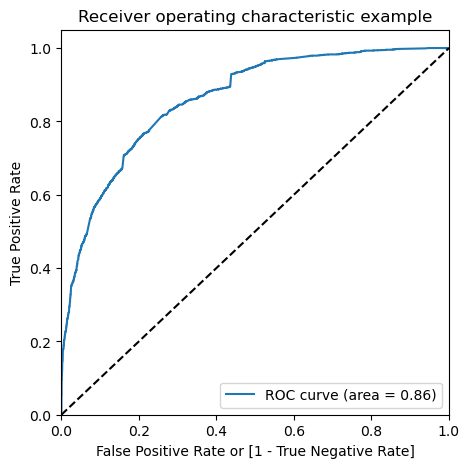

In [145]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff Point

- Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [146]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.862679,7962,1,1,1,1,1,1,1,1,1,1,0
1,0,0.167977,5520,0,1,1,0,0,0,0,0,0,0,0
2,0,0.472414,1962,0,1,1,1,1,1,0,0,0,0,0
3,1,0.947484,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.332745,9170,0,1,1,1,1,0,0,0,0,0,0


In [147]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.585060  0.979330  0.343790
0.2   0.2  0.695700  0.930550  0.551986
0.3   0.3  0.760358  0.832162  0.716418
0.4   0.4  0.782957  0.746176  0.805464
0.5   0.5  0.781858  0.642414  0.867189
0.6   0.6  0.780760  0.554775  0.919049
0.7   0.7  0.758475  0.439438  0.953706
0.8   0.8  0.731325  0.331542  0.975968
0.9   0.9  0.695072  0.210418  0.991652


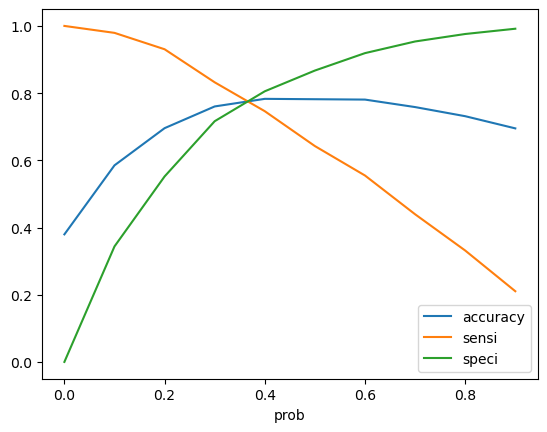

In [148]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- From the curve above, 0.37 is the optimum point to take it as a cutoff probability.

In [149]:
# Let us make the final prediction using 0.37 as the cut off

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.37 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.862679,7962,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.167977,5520,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.472414,1962,0,1,1,1,1,1,0,0,0,0,0,1
3,1,0.947484,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.332745,9170,0,1,1,1,1,0,0,0,0,0,0,0


In [150]:
# Now let us calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.862679,7962,1,1,1,1,1,1,1,1,1,1,0,1,86
1,0,0.167977,5520,0,1,1,0,0,0,0,0,0,0,0,0,17
2,0,0.472414,1962,0,1,1,1,1,1,0,0,0,0,0,1,47
3,1,0.947484,1566,1,1,1,1,1,1,1,1,1,1,1,1,95
4,0,0.332745,9170,0,1,1,1,1,0,0,0,0,0,0,0,33
5,0,0.116135,5097,0,1,1,0,0,0,0,0,0,0,0,0,12
6,0,0.574341,8954,1,1,1,1,1,1,1,0,0,0,0,1,57
7,1,0.237591,309,0,1,1,1,0,0,0,0,0,0,0,0,24
8,1,0.306111,5519,0,1,1,1,1,0,0,0,0,0,0,0,31
9,1,0.586401,1050,1,1,1,1,1,1,1,0,0,0,0,1,59


In [151]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    1842
0     577
Name: final_predicted, dtype: int64

In [152]:
# check the precentage of final_predicted conversions

1965/float(1965+497)

0.7981316003249391

`Hence we can see that the final prediction of conversions have a target of 80% (79.8%) conversion as per the X Educations CEO's requirement . Hence this is a good model.`

### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on train set

In [153]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7796610169491526

In [154]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )

confusion2

array([[3126,  827],
       [ 577, 1842]], dtype=int64)

In [155]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [156]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)


0.7614716825134353

In [157]:
# Let us calculate specificity

TN / float(TN+FP)

0.7907918036933974

In [158]:
# Calculate false postive rate - predicting conversions when leads has not converted

print(FP/ float(TN+FP))

0.2092081963066026


In [159]:
# Positive predictive value 

print (TP / float(TP+FP))

0.6901461221431248


In [160]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8441803942749122


### Precision and Recall

In [161]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3428,  525],
       [ 865, 1554]], dtype=int64)

In [162]:
from sklearn.metrics import precision_score, recall_score

In [163]:
# precision

precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7474747474747475

In [164]:
# recall

recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.642414220752377

### Precision and recall tradeoff

In [165]:
from sklearn.metrics import precision_recall_curve

In [166]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: Converted, Length: 6372, dtype: int64,
 0       1
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: predicted, Length: 6372, dtype: int64)

In [167]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

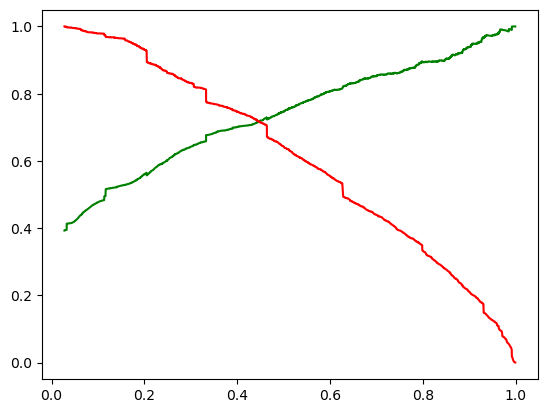

In [168]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on the test set

In [169]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [170]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,LeadOrigin_API,LeadOrigin_Lead Import,LeadSource_Olark Chat,LeadSource_Welingak Website,LastActivity_Converted to Lead,LastActivity_Olark Chat Conversation,LastActivity_SMS Sent,CurrentOccupation_Other,CurrentOccupation_Student,CurrentOccupation_Unemployed,CurrentOccupation_Working Professional,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Unreachable
3504,0,0.272727,0.188194,0,0,0,0,0,0,0,0,0,1,0,0,0
4050,0,0.000000,0.000000,0,0,0,0,0,0,1,0,0,1,0,0,0
7201,1,0.181818,0.316023,0,0,0,0,0,0,1,0,0,1,0,0,0
1196,0,0.363636,0.187750,0,0,0,0,0,0,0,0,0,1,0,0,0
8219,0,0.636364,0.109632,0,0,0,0,0,0,0,0,0,1,0,0,0


In [171]:
X_test_sm = sm.add_constant(X_test)

### Making predictions on the test set

In [172]:
y_test_pred = res.predict(X_test_sm)

In [173]:
y_test_pred[:10]

3504    0.309726
4050    0.463605
7201    0.355945
1196    0.299019
8219    0.215808
8747    0.116135
9048    0.173411
6524    0.236867
7693    0.178147
8187    0.463605
dtype: float64

In [174]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [175]:
# Let's see the head

y_pred_1.head()

,0
3504,0.309726
4050,0.463605
7201,0.355945
1196,0.299019
8219,0.215808


In [176]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [177]:
# Putting LeadId to index

y_test_df['LeadId'] = y_test_df.index

In [178]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [179]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [180]:
y_pred_final.head()

,Converted,LeadId,0
0,0,3504,0.309726
1,1,4050,0.463605
2,0,7201,0.355945
3,0,1196,0.299019
4,1,8219,0.215808


In [181]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [182]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex(columns=['LeadId', 'Converted', 'Converted_Prob'])


In [183]:
y_pred_final.head()

,LeadId,Converted,Converted_Prob
0,3504,0,0.309726
1,4050,1,0.463605
2,7201,0,0.355945
3,1196,0,0.299019
4,8219,1,0.215808


In [184]:
# Based on cut off threshold using accuracy, sensitivity and specificity of 0.37%

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)
y_pred_final.head()

,LeadId,Converted,Converted_Prob,final_predicted
0,3504,0,0.309726,0
1,4050,1,0.463605,1
2,7201,0,0.355945,0
3,1196,0,0.299019,0
4,8219,1,0.215808,0


In [185]:
# Based on cut off threshold using accuracy, sensitivity and specificity of 0.37%

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [186]:
y_pred_final.head()

,LeadId,Converted,Converted_Prob,final_predicted
0,3504,0,0.309726,0
1,4050,1,0.463605,1
2,7201,0,0.355945,0
3,1196,0,0.299019,0
4,8219,1,0.215808,0


In [187]:
# Now let us calculate the lead score

y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(20)

,LeadId,Converted,Converted_Prob,final_predicted,lead_score
0,3504,0,0.309726,0,31
1,4050,1,0.463605,1,46
2,7201,0,0.355945,0,36
3,1196,0,0.299019,0,30
4,8219,1,0.215808,0,22
5,8747,0,0.116135,0,12
6,9048,1,0.173411,0,17
7,6524,0,0.236867,0,24
8,7693,0,0.178147,0,18
9,8187,0,0.463605,1,46


In [188]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    804
0    238
Name: final_predicted, dtype: int64

In [189]:
# check the precentage of final_predicted conversions on test data

797/float(797+218)

0.7852216748768472

`Hence we can see that the final prediction of conversions have a target rate of 79% (78.5%) (Around 1 % short of the predictions made on training data set`

### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity on test set

In [190]:
# Let's check the accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7861589161479312

In [191]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1343,  346],
       [ 238,  804]], dtype=int64)

In [192]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [193]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7715930902111324

In [194]:
# Let us calculate specificity
TN / float(TN+FP)

0.7951450562462996

### Precision and Recall metrics for the test set

In [195]:
# precision
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# recall
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision  0.6991304347826087
recall  0.7715930902111324


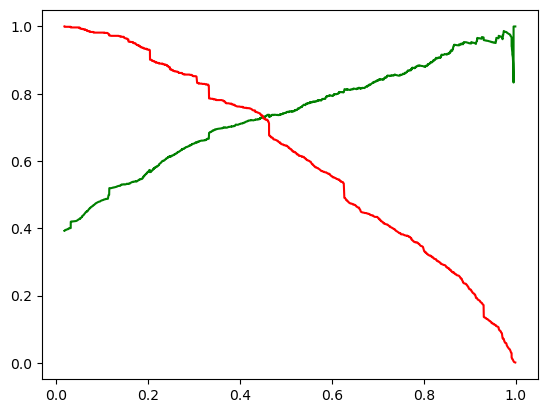

In [196]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Conclusion

- While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the
  optimal 
  cut off based on Sensitivity and Specificity for calculating the final prediction.
- Accuracy, Sensitivity and Specificity values of test set are around 79%, 77% and 80% which are approximately closer to 
  the respective values calculated using trained set.
- Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is 
  around 80%
- Hence overall this model seems to be good.  